# SVC

In the following, we try to implement a SVC to classify between the real and simulated data. Then we improve the performance of the model step-by-step by doing GridSearch and optimizing the parameters around the results.

Loading the data and splitting  them into train and test set

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

z = np.zeros((1500,1), dtype=int)
o = np.ones((1507, 1), dtype=int)

gen = np.loadtxt("qcs_gen.txt", delimiter=",")
gen = np.concatenate((gen, z), axis=1)
print(gen.shape)

real = np.loadtxt("qcs_real.txt", delimiter=",")
real = np.concatenate((real, o), axis=1)
print(real.shape)

data = np.concatenate((gen, real), axis=0)
print(data.shape)

train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True, stratify=None)
print(train.shape)

train, val = train_test_split(train, test_size=0.2, random_state=42, shuffle=True, stratify=None)

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(1500, 1102)
(1507, 1102)
(3007, 1102)
(2405, 1102)


Now we perform the SVC without optimised parameters

In [2]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = train[:, :-1]
y = train[:, -1]

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

We evaluate the performance of the SVC using accuracy:

In [3]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test[:, :-1])
y_true = test[:, -1]
accuracy_score(y_true, y_pred)

0.8837209302325582

Now, we try to increase the performance of the model by optimizing the parameters with Grid Search

In [4]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'svc__kernel':('linear', 'rbf', 'poly', 'sigmoid'), "svc__C": [0.001, 0.01, 0.1, 1, 10]}
pipeline = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
clf.fit(train[:, :-1], train[:, -1])

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(gamma='auto'))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

Let's see if the accuracy has increased

In [5]:
y_pred = clf.predict(test[:, :-1])
y_true = test[:, -1]
accuracy_score(y_true, y_pred)

0.9518272425249169

In [6]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(gamma='auto'))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__svc': SVC(gamma='auto'),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__svc__C': 1.0,
 'estimator__svc__break_ties': False,
 'estimator__svc__cache_size': 200,
 'estimator__svc__class_weight': None,
 'estimator__svc__coef0': 0.0,
 'estimator__svc__decision_function_shape': 'ovr',
 'estimator__svc__degree': 3,
 'estimator__svc__gamma': 'auto',
 'estimator__svc__kernel': 'rbf',
 'estimator__svc__max_iter': -1,
 'estimator__svc__probability': False,
 'estimator__svc__random_state': None,
 'estimator__svc__shrinking': True,
 'estimator__svc__tol': 0.001,
 'estimator__svc__verbose': False,
 'estimator': Pipeline(steps=[('standardscaler', StandardScaler

We have already been able to increase the accuracy from 88 to 95 percent using GridSearch. Now we try to improve the performance even more. Above we can see the "optimal" values. Using the determined best kernel "rbf", we do grid search again, around the "optimal" value for C, 1.0 .

In [7]:
parameters = {"svc__C": [0.1,0.5,0.7, 1,1.2,1.5,2, 2.5, 3, 3.5, 4,5,7]}
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto', probability = True))
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
clf.fit(train[:, :-1], train[:, -1])
y_pred = clf.predict(test[:, :-1])
y_true = test[:, -1]
accuracy_score(y_true, y_pred)

0.9401993355481728

In [8]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(gamma='auto', probability=True))],
 'estimator__verbose': False,
 'estimator__standardscaler': StandardScaler(),
 'estimator__svc': SVC(gamma='auto', probability=True),
 'estimator__standardscaler__copy': True,
 'estimator__standardscaler__with_mean': True,
 'estimator__standardscaler__with_std': True,
 'estimator__svc__C': 1.0,
 'estimator__svc__break_ties': False,
 'estimator__svc__cache_size': 200,
 'estimator__svc__class_weight': None,
 'estimator__svc__coef0': 0.0,
 'estimator__svc__decision_function_shape': 'ovr',
 'estimator__svc__degree': 3,
 'estimator__svc__gamma': 'auto',
 'estimator__svc__kernel': 'rbf',
 'estimator__svc__max_iter': -1,
 'estimator__svc__probability': True,
 'estimator__svc__random_state': None,
 'estimator__svc__shrinking': True,
 'estimator__svc__tol': 0.001,
 'estimator__svc__verbose': False,
 'estimator': Pipeline(steps

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x_data = test[:, :-1]
y_data = test[:, -1]

#standard scaling the data
standardscaler = StandardScaler()
x_data = standardscaler.fit_transform(x_data)

###---##---###  Nested CV & AUC
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=10, shuffle = True, random_state = 42)

# Nested CV with parameter optimization
clf = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=inner_cv, scoring='roc_auc')

# Making predictions
predictions = cross_val_predict(clf, X = x_data, y = y_data, cv
= outer_cv, method = 'predict_proba', n_jobs = -1)

In [12]:
nested_score_autoencoder = cross_val_score(clf, X=x_data, y=y_data, cv=outer_cv, scoring='roc_auc')
print(nested_score_autoencoder.mean(), nested_score_autoencoder.std())

0.9443146706216783 0.03884312523728886


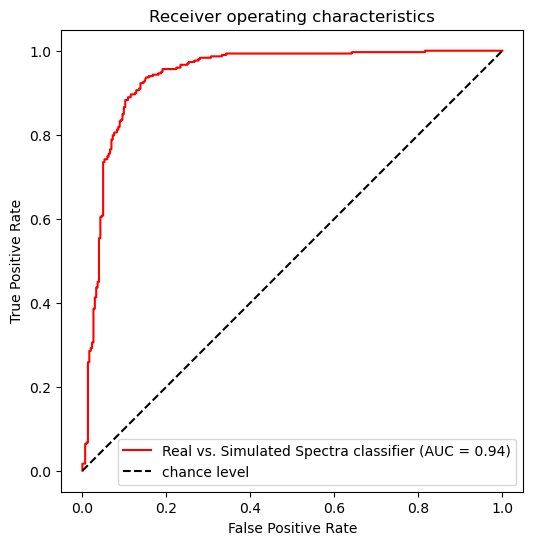

In [13]:
#keep only positive probabilities
predictions = predictions[:,1]

#calculating the ROC curves
fpr, tpr, _ = metrics.roc_curve(y_data, predictions)

#calculating the AUC's
auc = metrics.auc(fpr, tpr)

#sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))


#fpr_autoencoder, tpr_autoencoder, _ =
roc = RocCurveDisplay(fpr = fpr, 
                                  tpr = tpr, 
                                  roc_auc= auc, 
                                  estimator_name="Real vs. Simulated Spectra classifier")

roc.plot(color="red", ax=ax)

plt.plot([0, 1], [0, 1], "k--", label="chance level")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristics")
plt.legend()
plt.show()
